<a href="https://colab.research.google.com/github/Deare-stack/GenAI/blob/main/hw2_cnn_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name:Deare
## project: CNN model
## part 2: CNN Model (Using Strides)
## part 3 : Discussion Points

In [1]:
import numpy as np##Used for handling arrays and numerical operations.
import matplotlib.pyplot as plt##For plotting graphs and images.
from tensorflow.keras import layers, models, optimizers, utils, datasets##Importing various components from Keras for building and training neural networks.

In [2]:
NUM_CLASSES = 10  # Number of classes in the CIFAR-10 dataset

In [3]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
##Loads the CIFAR-10 dataset, which is commonly used for practicing machine learning techniques. This dataset contains 60,000 32x32 color images in 10 different classes.
x_train = x_train.astype("float32") / 255.0  ## Normalize training images to a [0, 1] scale by converting the datatype to float32 and dividing by 255
x_test = x_test.astype("float32") / 255.0    ## Normalize test images
y_train = utils.to_categorical(y_train, NUM_CLASSES)  ## Convert training labels to one-hot encoding
y_test = utils.to_categorical(y_test, NUM_CLASSES)    ## Convert testing labels to one-hot encoding

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
# Define the CNN model creation function using Sequential
def create_cnn_model(input_shape):
    model = models.Sequential([
        # Input layer configuration
        # Specifies the expected input shape for the model, initiating the model architecture
        layers.InputLayer(input_shape=input_shape),

        # First convolutional layer
        ##Conv2D: Applies convolution operation with specified number of filters and kernel size.
        ### Conv2D: Applies convolution operation with 32 filters of size 3x3
        ### Strides=1: The filter moves one pixel at a time
        ## padding='same' ensures the output has the same dimensions as the input.
        ##BatchNormalization: Normalizes the activations from the previous layer, which helps in speeding up the training process and achieving higher performance.
        ##LeakyReLU: Provides a small, non-zero gradient when the unit is not active, which helps the network learn faster and perform better.
        layers.Conv2D(32, kernel_size=3, strides=1, padding="same"),
        layers.BatchNormalization(),### BatchNormalization: Normalizes the outputs of the previous layer to improve the stability and speed of the network’s training
        layers.LeakyReLU(),### LeakyReLU: An activation function that allows a small gradient when the unit is not active, promoting a healthier gradient flow

        # Second convolutional layer
        ### Strides=2: Reduces the spatial dimensions (height and width) by half, increasing the field of view of the filters and reducing computational load
        layers.Conv2D(32, kernel_size=3, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Third convolutional layer
        ## Continues with 64 filters to extract more complex features and retains spatial dimensions with padding='same'
        layers.Conv2D(64, kernel_size=3, strides=1, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Fourth convolutional layer
        ## Further reduces the spatial dimensions by half to intensify feature extraction which can help in distinguishing more detailed features
        layers.Conv2D(64, kernel_size=3, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Flattening the output to feed into a dense layer
        ## Converts the 3D output of the last convolutional layer into 1D, making it possible to connect to dense layers
        layers.Flatten(),

        # Fully connected layer
        ## Dense layer with 128 units to further process features into a more abstract representation
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(0.5),### Dropout to prevent overfitting by randomly setting 50% of the input units to zero at each update during training

        # Output layer
        layers.Dense(NUM_CLASSES, activation='softmax')### Dense layer with a softmax activation to classify the input into one of the NUM_CLASSES categories
    ])
    return model

In [5]:
# Create the CNN model
model = create_cnn_model((32, 32, 3))

# Compile the model with Adam optimizer and categorical crossentropy loss
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Model summary to show layers and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)        0

In [6]:
# Train the model with validation data
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.5420 - accuracy: 0.4605 - val_loss: 1.2157 - val_accuracy: 0.5640
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1574 - accuracy: 0.5919 - val_loss: 1.1376 - val_accuracy: 0.6057
Epoch 3/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.0066 - accuracy: 0.6482 - val_loss: 1.0797 - val_accuracy: 0.6256
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9216 - accuracy: 0.6793 - val_loss: 0.9252 - val_accuracy: 0.6751
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8531 - accuracy: 0.7039 - val_loss: 0.9897 - val_accuracy: 0.6680
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8047 - accuracy: 0.7182 - val_loss: 0.9096 - val_accuracy: 0.6843
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7606 - accuracy: 0.7344 - val_loss: 1.0005 -

In [7]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 91ms/step - loss: 0.8651 - accuracy: 0.7094


[0.8651490211486816, 0.7093999981880188]

In [8]:
# Array of class labels for CIFAR-10
CLASSES = np.array(
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
)

# Make predictions on the test data
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 2s 6ms/step


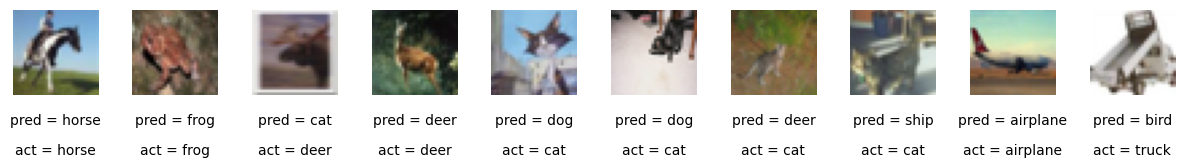

In [9]:
# Visualize predictions for 10 random images from the test set
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes
    )
    ax.imshow(img)

plt.show()

# ✅**Part 3: Discussion Points**

### Q1:Performance Comparison: Discuss the test accuracy and loss of both models.

1. Multi-Layer Perceptron (MLP):

Accuracy: MLP has lower accuracy in tasks in my case lowest accuracy up to 0.3332 such as CIFAR-10 compared to CNN. This is due to the fact that MLP cannot effectively utilize the spatial and compositional structure of an image.


Loos: MLPs have a high loss rate in image classification the in my case highest loss in MLP was up to 1.8647, because they struggle to model complex visual data. This makes it hard for them to generalize from training data to unseen test data.

Another reason for cause this situation is overfitting Due to the MLP model fully connected nature and the large number of parameters often required, MLPs are more prone to overfitting so that de model have **High Training Accuracy but Low Testing Accuracy**.

2. Convolutional Neural Network (CNN) Model:

Accuracy: CNNs perform better in image-related tasks because of their ability to capture patterns such as edges, textures, and shapes within specific regions of the input image.

Loss: CNNs are better at minimizing loss on image datasets because their architecture is designed to recognize visual patterns directly.The layers can capture high-level features.


### Q2: Model Complexity: Explain why CNNs are generally better suited for image classification tasks compared to MLPs, focusing on the spatial hierarchies learned by CNNs.

As I mentioned the layers of  CNNs process images through multiple layers where each layer can fetch high-level features and able to detect and use features like edges and shapes, which are fundamental to understanding images which helps CNNs focus on the most informative parts of an image.

### Q3: Training Time: Compare the training time and resource usage of both models.


In  my case MLP model Training time is less than CNNs. Beacause CNNs utilize a series of convolutional layers which apply various filters to the input and each layers focus on high-level features and maintain spatial hierarchy use resources more efficiently also CNN runs at my GPU and my GPU loss connection with colab while traning the data is one of the the reason cause the more time.


### Q4: Overfitting and Regularization: Discuss any signs of overfitting and how regularization techniques like dropout help mitigate it.

As I mentioned above, my MLPs has overfitting stuiation, cause High Training Accuracy but Low Test Accuracy this is the signs of overfitting, can see through this overfitting stuiation the model has poor generalization which means model pridiction are correct for training data but incorrect for new data. Dropout is a form of regularization technique by randomly removing neurons during training to effectively reduce the risk of model overfitting and improve the generalisation of the model to new unseen data. Dropout also can be use in MLP model and CNN model.